In [1]:
import collections


## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))

## basic config
base_path = "/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/"
analysis_directory = "analysis"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + data_directory
analysis_path = data_path + "/" + analysis_directory

print (data_path)
print (analysis_path)



/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/082_Final
/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/082_Final/analysis


In [2]:
%cd {data_path}
%mkdir {analysis_directory}
%cd {analysis_directory}
%pwd


/home/rosiec/Dropbox/School_Docs/Papers/ALife CE Paper/alife2016/evo_mod/082_Final
mkdir: cannot create directory ‘analysis’: File exists
/home/rosiec/Dropbox/School_Docs/Papers/ALife CE Paper/alife2016/evo_mod/082_Final/analysis


u'/home/rosiec/Dropbox/School_Docs/Papers/ALife CE Paper/alife2016/evo_mod/082_Final/analysis'

In [3]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.18.0'

In [4]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

## Functional vs Vestigial Sites


```bash
rosiec@13-42-76:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py  --error --groups 3 --xticks "Static (control),Benign,Hostile" --columns "1,2,3" --legend "Fluctuating Task Only,Backbone Task Only,Both Tasks" --pair --title "Vestigial Site Count by Task

and Treatment Environment" --ylabel "Vestigial Sites" --xlabel "Treatment Environment" --separator "," degenerate_sites__intertwined___nototal.png c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv

rosiec@13-42-76:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py --error --groups 3 --xticks "Static (control),Benign,Hostile" --columns "1,2,3" --legend "Fluctuating Task Only,Backbone Task Only,Both Tasks" --pair --title "Functional Site Count by Task

and Treatment Environment" --ylabel "Functional Sites" --xlabel "Treatment Environment" --separator "," active_sites__intertwined___nototal.png c*_active_site_count.csv n*_active_site_count.csv p*_active_site_count.csv
```

control
noreward
punish
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py --error --xsize 850 --ysize 400 --groups 3 --xticks "Static (control),Benign,Harsh" --columns "1,2,3" --legend "EQU Only,XOR Only,XOR & EQU" --pair --title "Vestigial Site Count" --ylabel "Sites" --xlabel "Treatment Environment" --separator "," degenerate_sites__intertwined___nototal.png ../last_common_ancestor_mutation_landscapes/control*_degenerate_site_count.csv ../last_common_ancestor_mutation_landscapes/noreward*_degenerate_site_count.csv ../last_common_ancestor_mutation_landscapes/punish*_degenerate_site_count.csv 


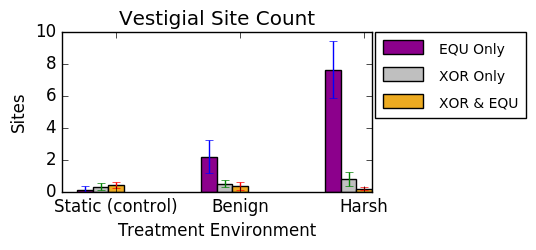

In [9]:
datafiles = ""
subdir = "../last_common_ancestor_mutation_landscapes"
for treatment in treatments:
    print (treatment)
    datafiles += subdir + "/" + treatment + "*_degenerate_site_count.csv "
    #datafiles += 'average.dat 4 "../' + treatment + '_*/data*/" "' 
    #datafiles += "_".join(treatments[treatment].split(" ")) + '" '  

script = scripts_path + 'graph_generation/bar_chart_from_csv.py '
script += '--error '
script += '--xsize 850 --ysize 400 '
script += '--groups 3 --xticks "Static (control),Benign,Harsh" ' 
script += '--columns "1,2,3" --legend "EQU Only,XOR Only,XOR & EQU" ' 
script += '--pair --title "Vestigial Site Count" '
script += '--ylabel "Sites" --xlabel "Treatment Environment" '
script += '--separator "," '
script += 'degenerate_sites__intertwined___nototal.png '
script += datafiles
#script += 'c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv '

print (script)

!python2 $script

ipyImage('degenerate_sites__intertwined___nototal.png') 

control
noreward
punish
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py --error --xsize 850 --ysize 400 --groups 3 --xticks "Static (control),Benign,Harsh" --columns "1,2,3" --legend "EQU Only,XOR Only,XOR & EQU" --pair --title "Functional Site Count" --ylabel "Sites" --xlabel "Treatment Environment" --separator "," functional_sites__intertwined___nototal.png ../last_common_ancestor_mutation_landscapes/control*_active_site_count.csv ../last_common_ancestor_mutation_landscapes/noreward*_active_site_count.csv ../last_common_ancestor_mutation_landscapes/punish*_active_site_count.csv 


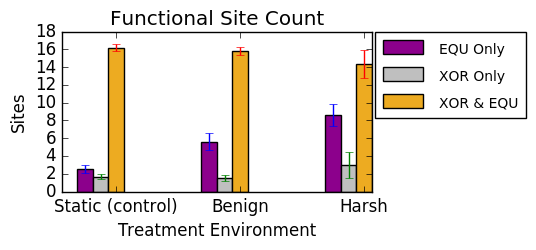

In [8]:
datafiles = ""
subdir = "../last_common_ancestor_mutation_landscapes"
for treatment in treatments:
    print (treatment)
    datafiles += subdir + "/" + treatment + "*_active_site_count.csv "
    #datafiles += 'average.dat 4 "../' + treatment + '_*/data*/" "' 
    #datafiles += "_".join(treatments[treatment].split(" ")) + '" '  

script = scripts_path + 'graph_generation/bar_chart_from_csv.py '
script += '--error '
script += '--xsize 850 --ysize 400 '
script += '--groups 3 --xticks "Static (control),Benign,Harsh" ' 
script += '--columns "1,2,3" --legend "EQU Only,XOR Only,XOR & EQU" ' 
script += '--pair --title "Functional Site Count" '
script += '--ylabel "Sites" --xlabel "Treatment Environment" '
script += '--separator "," '
script += 'functional_sites__intertwined___nototal.png '
script += datafiles
#script += 'c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv '

print (script)

!python2 $script

ipyImage('functional_sites__intertwined___nototal.png') 


## Population Per Site Entropy

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/punish_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_by_site_entropy.py --show --title "Hostile Treatment" by_site_entropy__hostile__for_poster.png by_site_entropy.csv

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/noreward_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_by_site_entropy.py --show --title "Benign Treatment" by_site_entropy__benign__for_poster.png by_site_entropy.csv

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --title "Population Entropy by Site and Genotype

Control (Static) Environment" control__entropy.png ../populations/control_intertwined_820001/by_site_entropy.csv


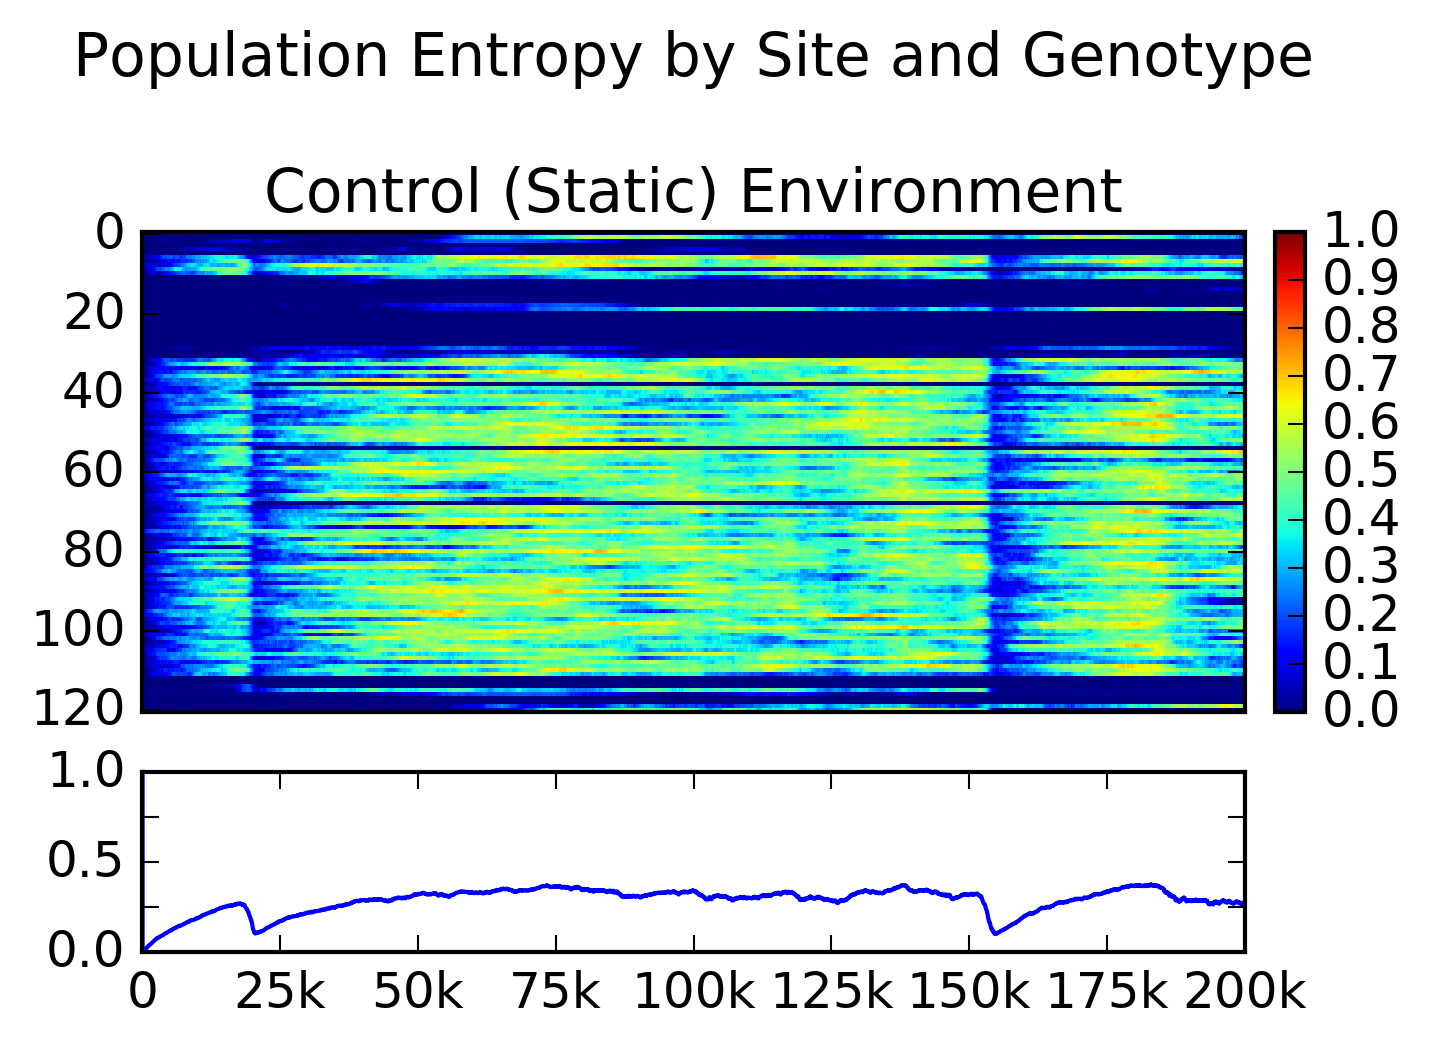

In [20]:
datafiles = ""
subdir = "../populations/control_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
#script += '--ylabel1 "Genome Site" '
#script += '--ylabel2 "Mean\nEntropy" '
#script += '--xlabel "Updates" '
#script += '--ylim 1000 '
script += '--title "Population Entropy by Site and Genotype\n\nControl (Static) Environment" '
script += 'control__entropy.png '
script += subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('control__entropy.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --ylabel1 "Genome Locus
(Instruction Site)" --ylabel2 "Mean
Entropy" --title "Benign Environment" benign__entropy.png ../populations/noreward_intertwined_820001/by_site_entropy.csv


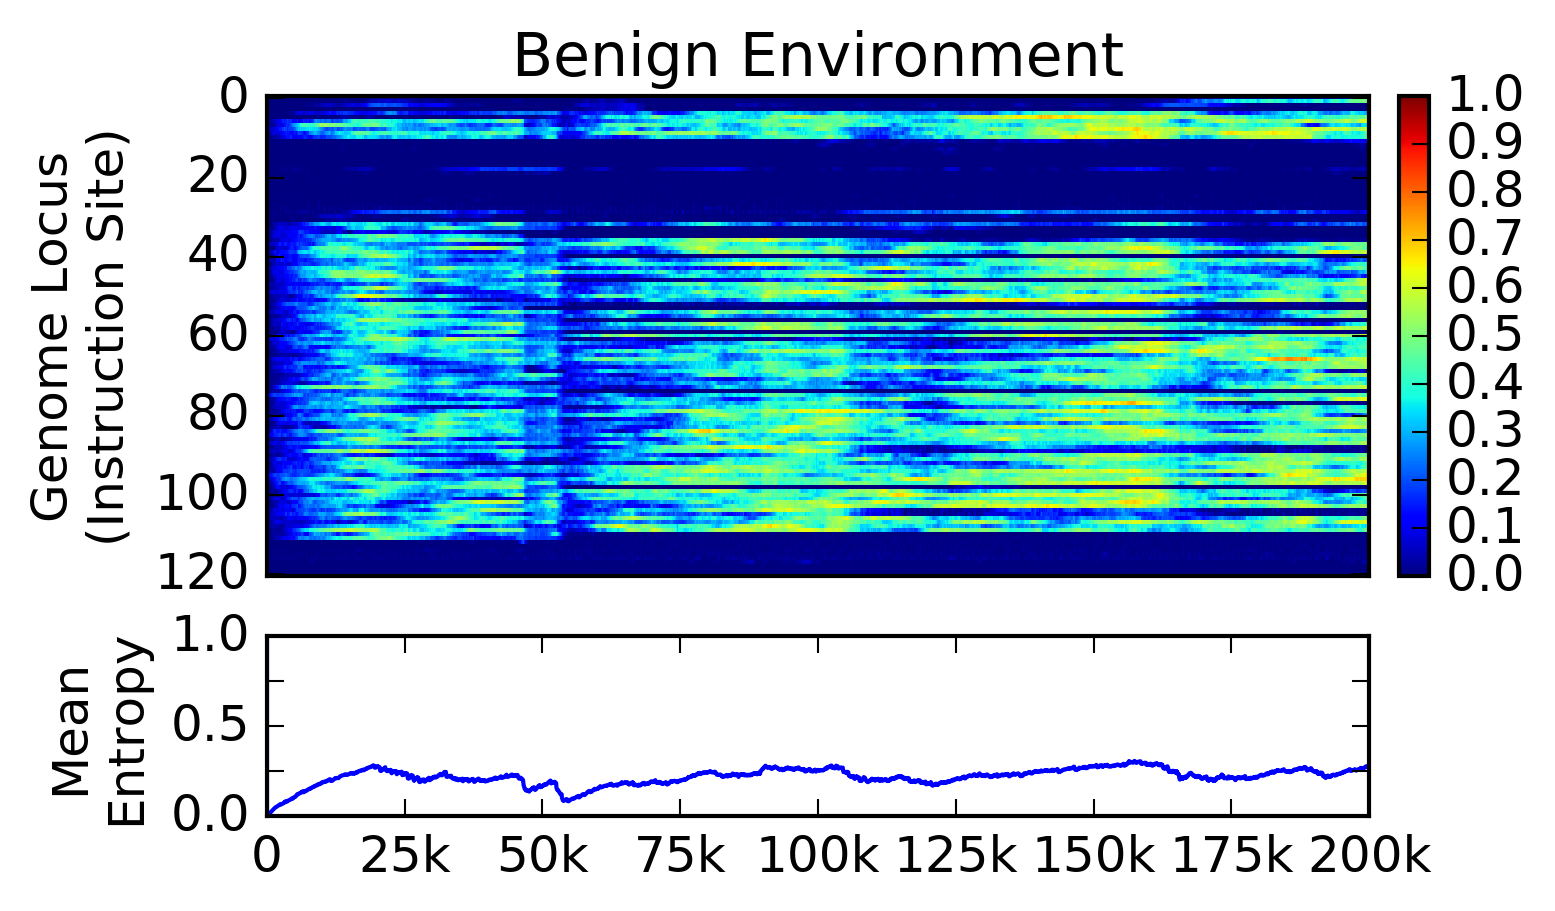

In [19]:
datafiles = ""
subdir = "../populations/noreward_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
script += '--ylabel1 "Genome Locus\n(Instruction Site)" '
script += '--ylabel2 "Mean\nEntropy" '
#script += '--xlabel "Updates" '
#script += '--ylim 1000 '
script += '--title "Benign Environment" '
script += 'benign__entropy.png '
script += subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('benign__entropy.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_by_site_entropy.py --xsize 1560 --ysize 900 --xlabel "Time (Updates)" --title "Harsh Environment" harsh__entropy.png ../populations/punish_intertwined_820001/by_site_entropy.csv


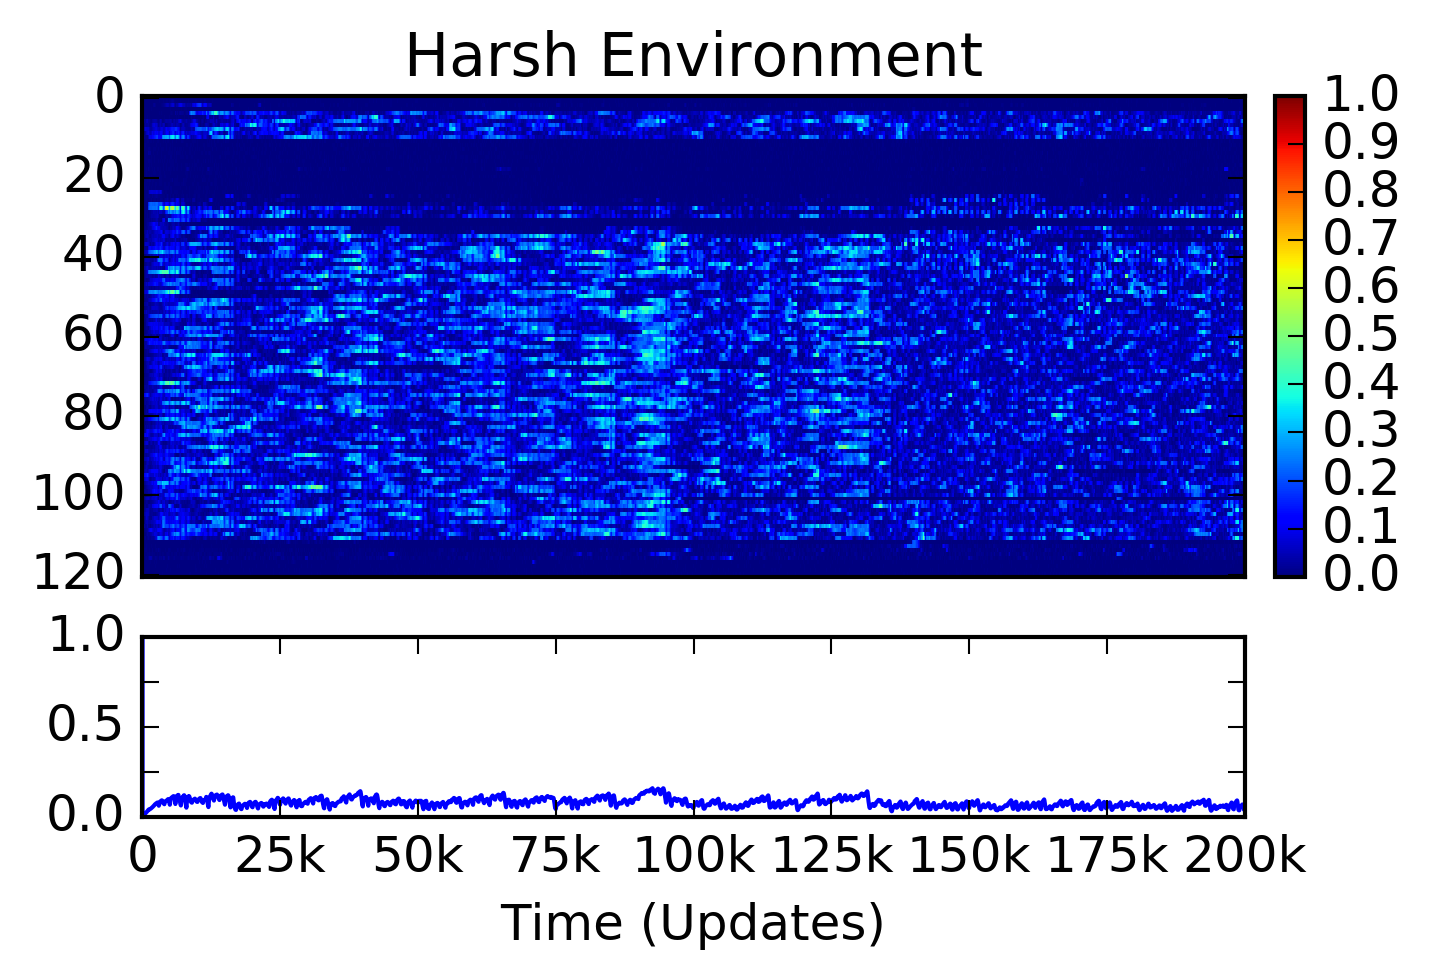

In [20]:
datafiles = ""
subdir = "../populations/punish_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_by_site_entropy.py '
#script += '--horizontal '
script += '--xsize 1560 --ysize 900 '
#script += '--legend '
#script += '--ylabel1 "Genome Site" '
#script += '--ylabel2 "Mean\nEntropy" '
script += '--xlabel "Time (Updates)" '
#script += '--ylim 1000 '
script += '--title "Harsh Environment" '
script += 'harsh__entropy.png '
script += subdir + "by_site_entropy.csv" 

print (script)

!python2 $script

ipyImage('harsh__entropy.png') 

## Flame Graphs

#### Generated the distances on the hpcc
```bash
caninoko@dev-intel07:/mnt/scratch/caninoko/082/populations$ for i in c*_i*_??????; do echo $i; if [ ! -e $i/phylo_depth_abundances_over_time.csv ] ; then cd $i; python ~/scripts/population_phylogenetic_distance_over_time.py -v -o phylo_depth_abundances_over_time.csv detail-?.spop* detail-??.spop* detail-???.spop* detail-????.spop* detail-?????.spop* detail-??????.spop* ; cd ../; else ; echo "Skipping." ; fi ; done
```

#### Actually produce the flame graphs
```bash
rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/control_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Control Treatment" --most_recent_coalescence="../../INTERTWINED/control_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__control__forposter.png phylo_depth_abundances_over_time.csv

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/noreward_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Benign Treatment" --most_recent_coalescence="../../INTERTWINED/noreward_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__benign__forposter.png phylo_depth_abundances_over_time.csv

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/punish_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Hostile Treatment" --most_recent_coalescence="../../INTERTWINED/punish_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__hostile__forposter.png phylo_depth_abundances_over_time.csv
```

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 600 --ylabel " " --xlabel " " --most_recent_coalescence="../control_intertwined_820001/data/stats.dat,10" --title "Phylogenetic Depth and Last Coalescence

Control (Static) Environment" control__phylodepth_with_coalescense.png ../populations/control_intertwined_820001/phylo_depth_abundances_over_time.csv


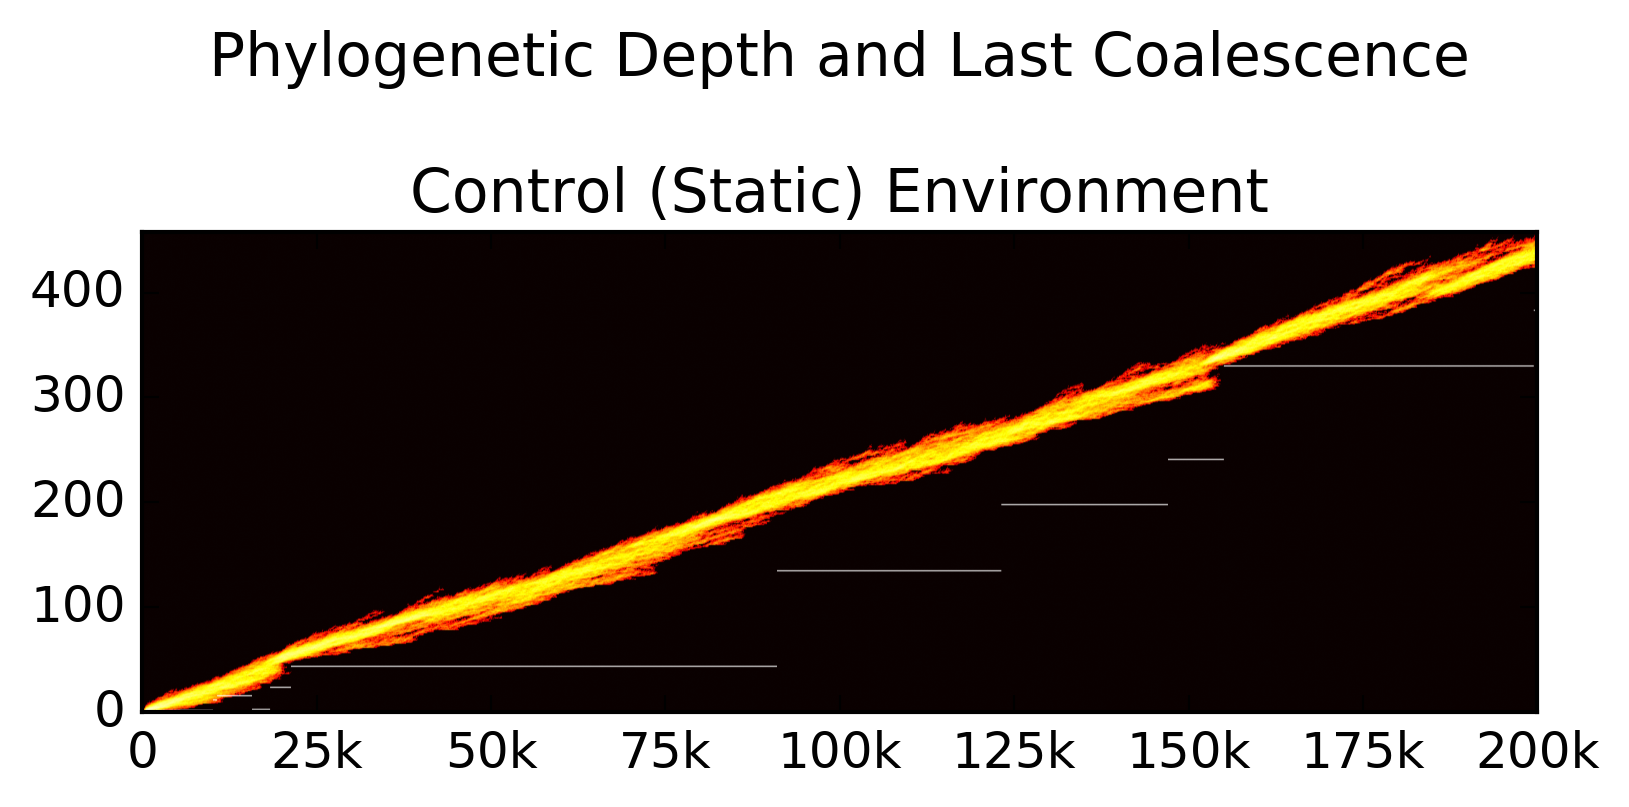

In [26]:
datafiles = ""
subdir = "../populations/control_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
script += '--xsize 1950 --ysize 600 '
#script += '--legend '
script += '--ylabel " " '
script += '--xlabel " " '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="../control_intertwined_820001/data/stats.dat,10" '
script += '--title "Phylogenetic Depth and Last Coalescence\n\nControl (Static) Environment" '
script += 'control__phylodepth_with_coalescense.png '
script += subdir + "phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('control__phylodepth_with_coalescense.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 600 --ylabel "Steps from Ancestor
(Phylogenetic Depth)" --xlabel " " --most_recent_coalescence="../noreward_intertwined_820001/data/stats.dat,10" --title "Benign Environment" benign__phylodepth_with_coalescense.png ../populations/noreward_intertwined_820001/phylo_depth_abundances_over_time.csv


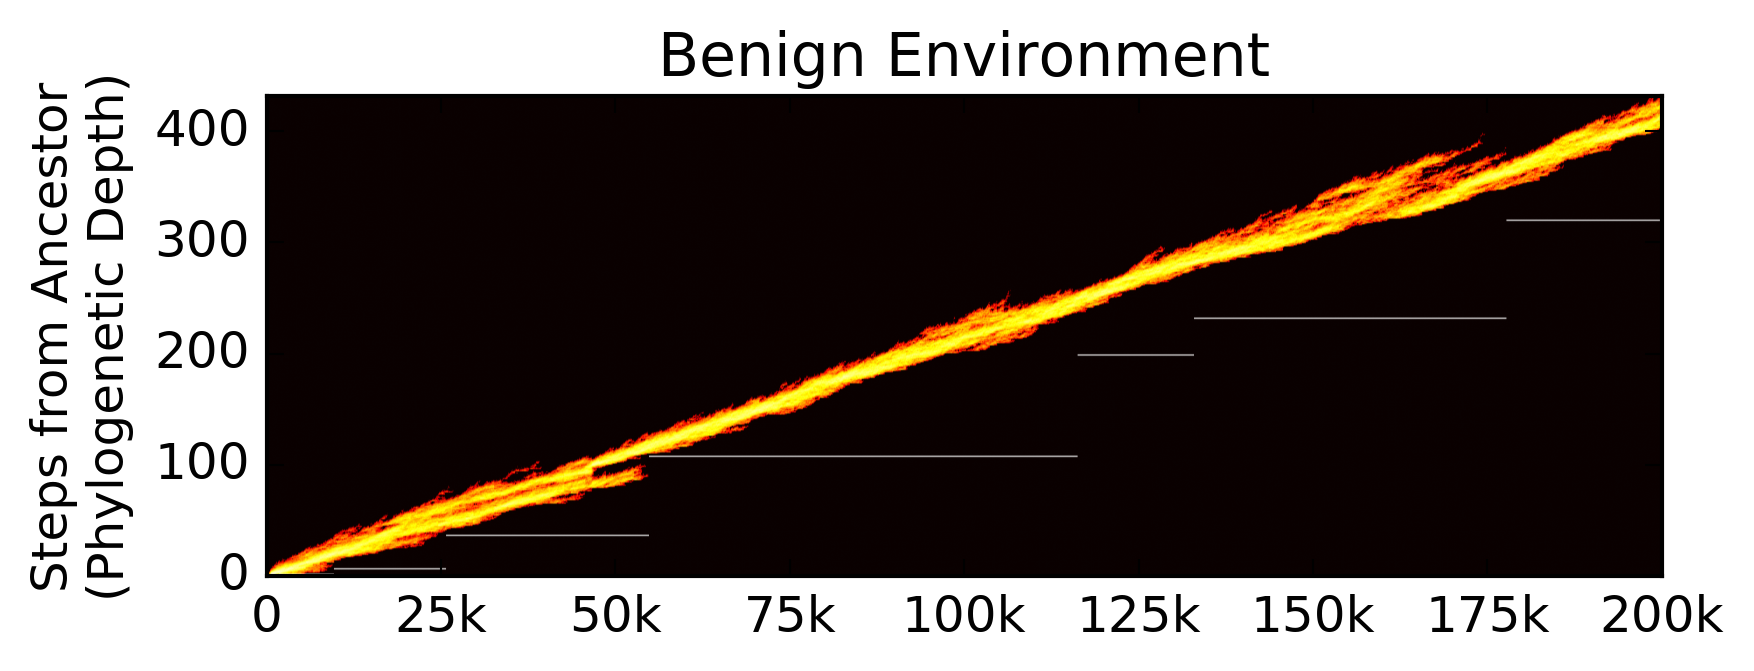

In [25]:
datafiles = ""
subdir = "../populations/noreward_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
script += '--xsize 1950 --ysize 600 '
#script += '--legend '
script += '--ylabel "Steps from Ancestor\n(Phylogenetic Depth)" '
script += '--xlabel " " '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="../noreward_intertwined_820001/data/stats.dat,10" '
script += '--title "Benign Environment" '
script += 'benign__phylodepth_with_coalescense.png '
script += subdir + "phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('benign__phylodepth_with_coalescense.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 1000 --ylabel " " --xlabel "Time (Updates)" --most_recent_coalescence="../punish_intertwined_820001/data/stats.dat,10" --title "Harsh Environment" harsh__phylodepth_with_coalescense.png ../populations/punish_intertwined_820001/phylo_depth_abundances_over_time.csv


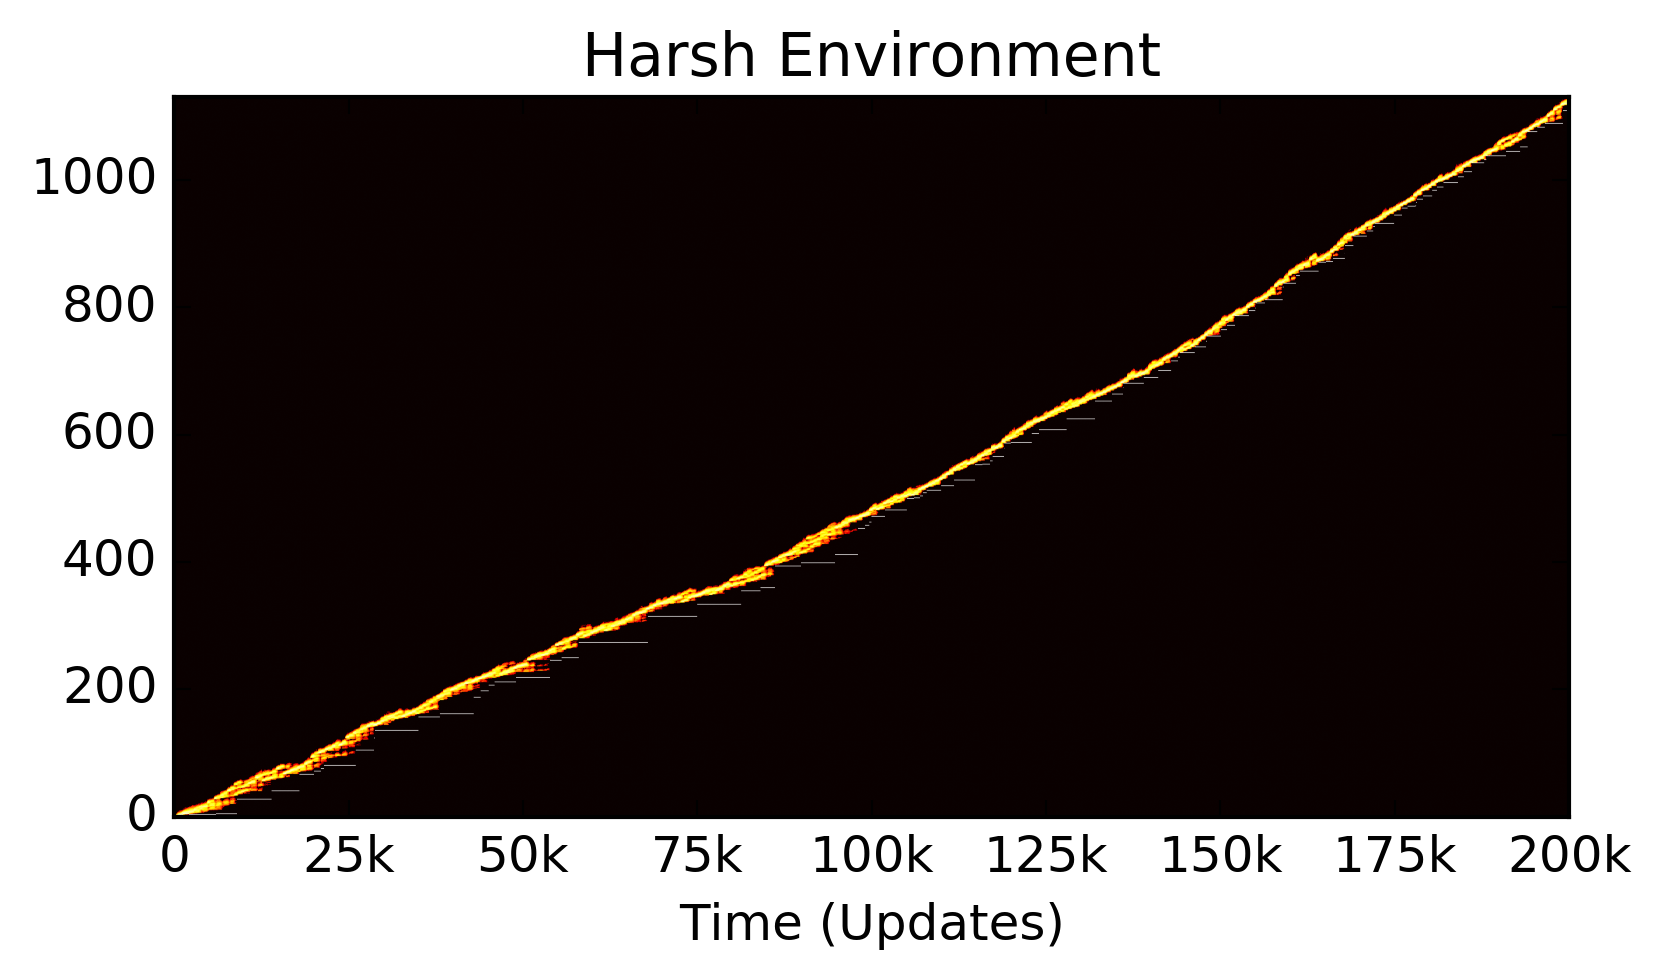

In [27]:
datafiles = ""
subdir = "../populations/punish_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
#script += '--xsize 1300 --ysize 800 '
script += '--xsize 1950 --ysize 1000 '
#script += '--legend '
script += '--ylabel " " '
script += '--xlabel "Time (Updates)" '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="../punish_intertwined_820001/data/stats.dat,10" '
script += '--title "Harsh Environment" '
script += 'harsh__phylodepth_with_coalescense.png '
script += subdir + "phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('harsh__phylodepth_with_coalescense.png') 

In [1]:
%pwd

'/home/rosiec/Dropbox/School_Docs/Papers/ALife CE Paper/alife2016'

## Lineage Maps

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/control_intertwined_820001/task_mappings$ python ../../../../../../scripts/analysis/extract_task_mappings.py --lineage_map -a complete_lineage_map.csv -v 5 6 8 ../data/lineage.dat ../data/phenotype/

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/control_intertwined_820001/task_mappings$ python ../../../../../../scripts/graph_generation/draw_map_task.py whole_taskmap.png lineage_map__complete_lineage_map.csv__values_only.csv

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a control_complete_lineage_map.csv 5 6 8 ../control_intertwined_820001//data/lineage.dat ../control_intertwined_820001//data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2000 --ysize 525 --title "Lineage Task-Sites

Control (Static) Environment" control__whole_taskmap.png lineage_map__control_complete_lineage_map.csv__values_only.csv 


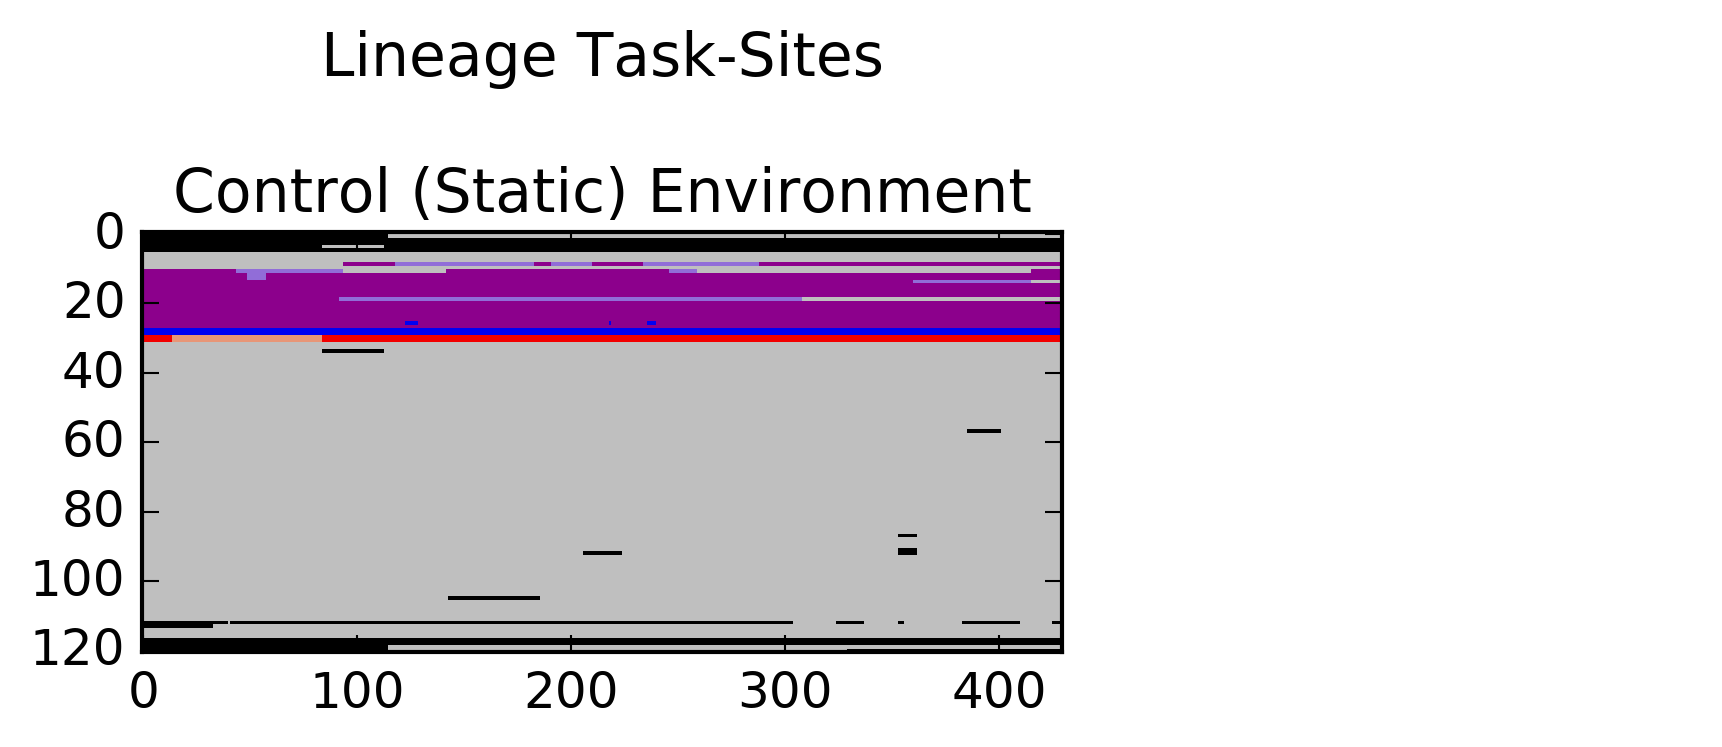

In [9]:
datafiles = ""
subdir = "../control_intertwined_820001/"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a control_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 525 '
#script += '--legend '
#script += '--ylabel "Genome Sites" '
#script += '--xlabel "Steps from Ancestor" '
script += '--title "Lineage Task-Sites\n\nControl (Static) Environment" '
script += 'control__whole_taskmap.png '
script += "lineage_map__control_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('control__whole_taskmap.png') 

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a control_complete_lineage_map.csv 5 6 8 ../control_intertwined_820001/data/lineage.dat ../control_intertwined_820001/data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2000 --ysize 750 --legend legend__whole_taskmap.png lineage_map__control_complete_lineage_map.csv__values_only.csv 


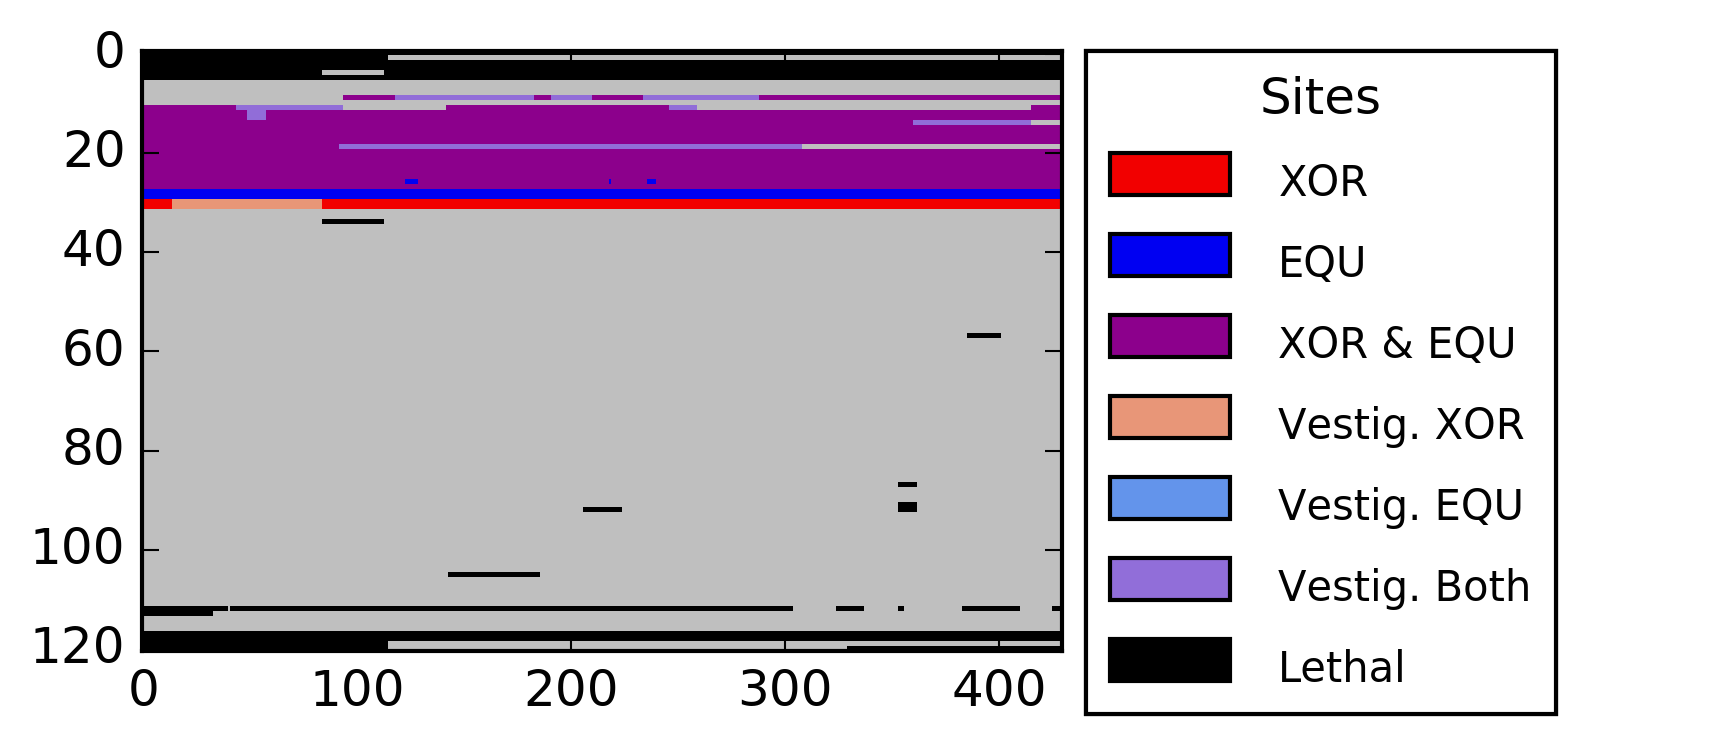

In [7]:
datafiles = ""
subdir = "../control_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a control_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 750 '
script += '--legend '
#script += '--ylabel "Genome Sites" '
#script += '--xlabel "Steps from Ancestor" '
#script += '--title "Lineage Task-Sites\n\nControl (Static) Environment" '
script += 'legend__whole_taskmap.png '
script += "lineage_map__control_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('legend__whole_taskmap.png') 

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a noreward_complete_lineage_map.csv 5 6 8 ../noreward_intertwined_820001/data/lineage.dat ../noreward_intertwined_820001/data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2000 --ysize 525 --ylabel "Genome Locus
(Instruction Site)" --title "Benign Environment" benign__whole_taskmap.png lineage_map__noreward_complete_lineage_map.csv__values_only.csv 


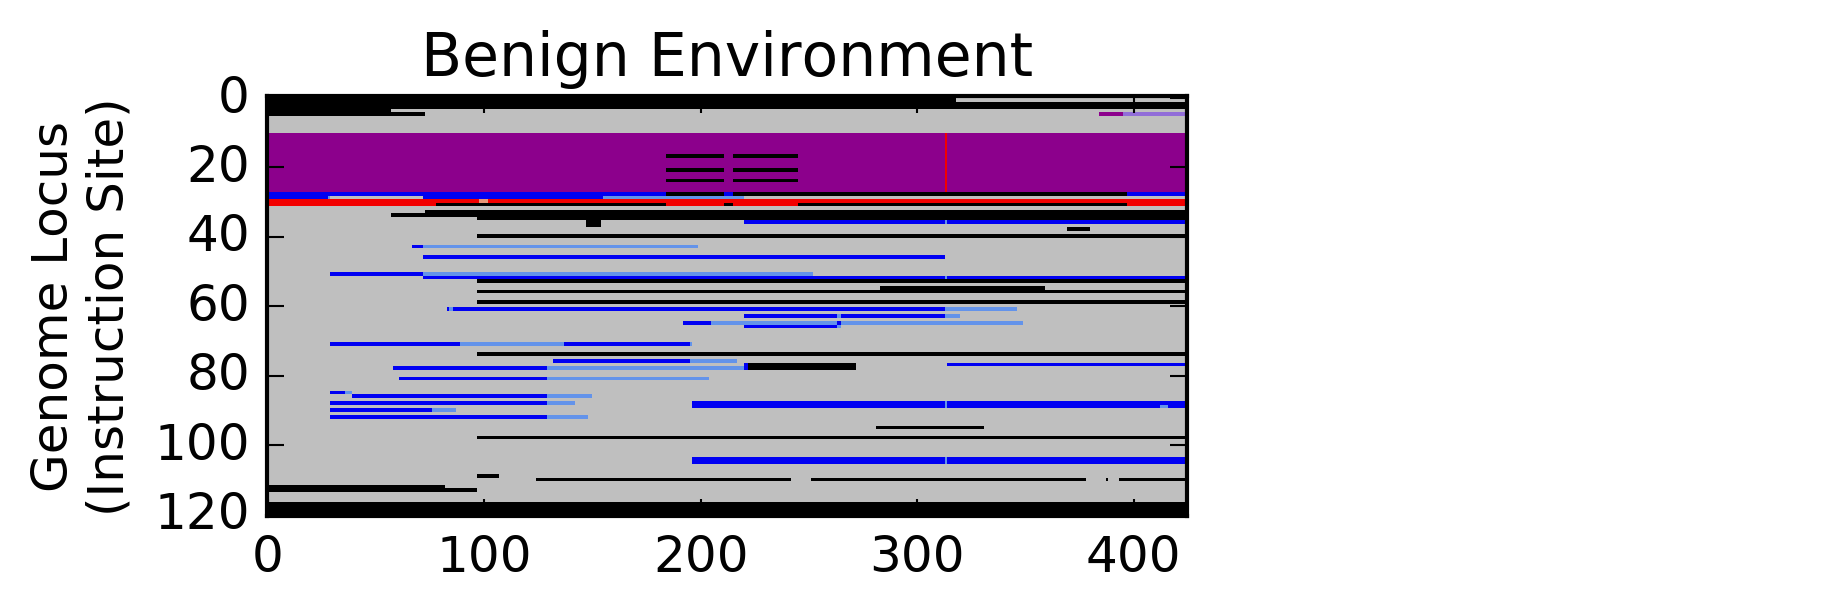

In [10]:
datafiles = ""
subdir = "../noreward_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a noreward_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 525 '
script += '--ylabel "Genome Locus\n(Instruction Site)" '
#script += '--xlabel "Steps from Ancestor" '
script += '--title "Benign Environment" '
script += 'benign__whole_taskmap.png '
script += "lineage_map__noreward_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('benign__whole_taskmap.png') 

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a punish_complete_lineage_map.csv 5 6 8 ../punish_intertwined_820001/data/lineage.dat ../punish_intertwined_820001/data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2350 --ysize 525 --xlabel "Steps from Ancestor
(Phylogenetic Depth)" --title "Harsh Environment" harsh__whole_taskmap.png lineage_map__punish_complete_lineage_map.csv__values_only.csv 


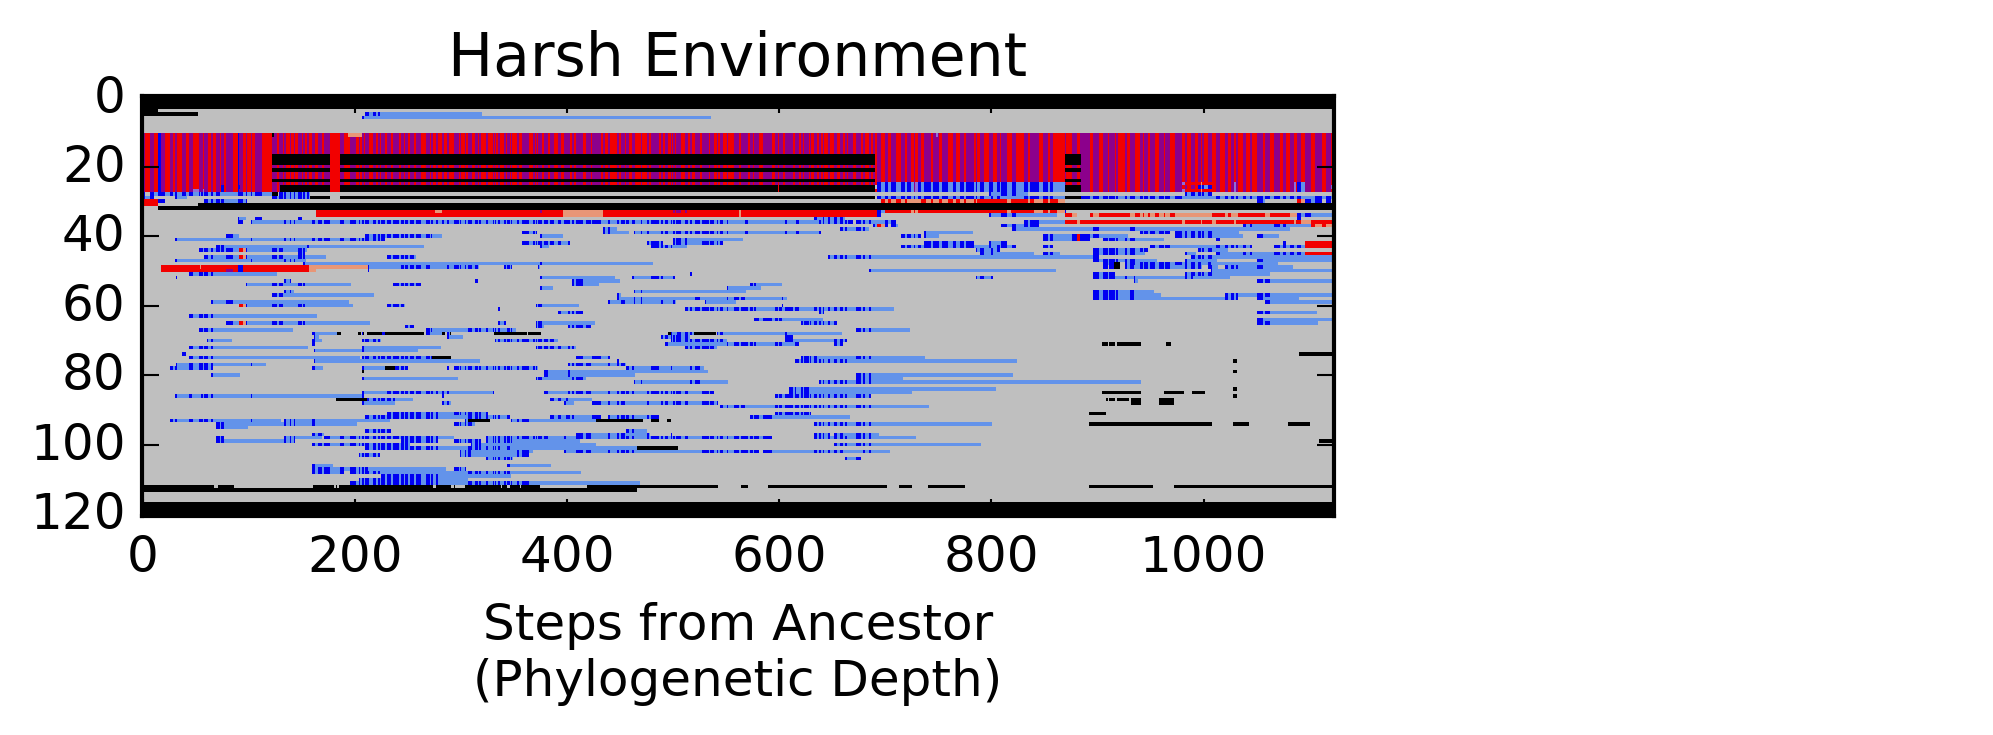

In [11]:
datafiles = ""
subdir = "../punish_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a punish_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2350 --ysize 525 '
#script += '--ylabel "Genome Sites" '
script += '--xlabel "Steps from Ancestor\n(Phylogenetic Depth)" '
script += '--title "Harsh Environment" '
script += 'harsh__whole_taskmap.png '
script += "lineage_map__punish_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('harsh__whole_taskmap.png') 

## Mutational Landscaping

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py 
    --groups 3 
    --xticks "Control,Benign,Hostile" 
    --columns "12" 
    --pair 
    --title "Fraction of Single-step Mutants that Lost Fluctuating Task" 
    --ylabel "Fraction" 
    --xlabel "Treatment" 
    --separator "," 
    --error 
    --show twostep_does_fluct.png 
    c*_*/mutation_landscape_metrics.csv 
    n*_*/mutation_landscape_metrics.csv 
    p*_*/mutation_landscape_metrics.csv &

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/085$ python ../../../scripts/graph_generation/bar_chart_from_csv.py 
    --groups 3 
    --xticks "Control,Control,Hostile" 
    --columns "3" 
    --pair --title "Fraction of Second-step Mutants that Regained Fluctuating Task" 
    --ylabel "Fraction" --xlabel "Treatment" --separator "," --show --error 
    two_step__regained_fluct.png 
    c*_i/mutation_landscape_metrics.csv 
    n*_i/mutation_landscape_metrics.csv 
    p*_i/mutation_landscape_metrics.csv &






control
noreward
punish
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py --error --xsize 1000 --ysize 500 --groups 3 --xticks "Static (control),Benign,Harsh" --columns "12" --pair --title "Fraction of 1-Step Mutants That Lost EQU 
" --ylabel "Fraction of Mutants" --xlabel "Treatment Environment" --separator "," onestep_lost_fluct.png ../last_common_ancestor_mutation_landscapes/control*_*/mutation_landscape_metrics.csv ../last_common_ancestor_mutation_landscapes/noreward*_*/mutation_landscape_metrics.csv ../last_common_ancestor_mutation_landscapes/punish*_*/mutation_landscape_metrics.csv 


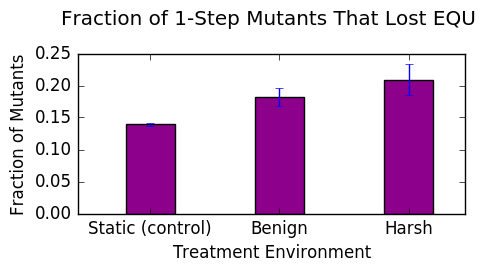

In [12]:
datafiles = ""
subdir = "../last_common_ancestor_mutation_landscapes"
for treatment in treatments:
    print (treatment)
    datafiles += subdir + "/" + treatment + "*_*/mutation_landscape_metrics.csv "
    #datafiles += 'average.dat 4 "../' + treatment + '_*/data*/" "' 
    #datafiles += "_".join(treatments[treatment].split(" ")) + '" '  

script = scripts_path + 'graph_generation/bar_chart_from_csv.py '
script += '--error '
script += '--xsize 1000 --ysize 500 '
script += '--groups 3 --xticks "Static (control),Benign,Harsh" ' 
script += '--columns "12" '
#script += '--legend "EQU Only,XOR Only,XOR & EQU" ' 
script += '--pair --title "Fraction of 1-Step Mutants That Lost EQU \n" '
script += '--ylabel "Fraction of Mutants" --xlabel "Treatment Environment" '
script += '--separator "," '
script += 'onestep_lost_fluct.png '
script += datafiles
#script += 'c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv '

print (script)

!python2 $script

ipyImage('onestep_lost_fluct.png') 


control
noreward
punish
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py --error --xsize 850 --ysize 500 --groups 3 --xticks "Static (control),Benign,Harsh" --columns "12,11,13" --legend "Lost EQU,Lost XOR,Lost Both" --pair --title "Fraction of 1-Step Mutants
That Lost XOR or EQU" --ylabel "Fraction of Mutants" --xlabel "Treatment Environment" --separator "," onestep_lost_fluct.png ../last_common_ancestor_mutation_landscapes/control*_*/mutation_landscape_metrics.csv ../last_common_ancestor_mutation_landscapes/noreward*_*/mutation_landscape_metrics.csv ../last_common_ancestor_mutation_landscapes/punish*_*/mutation_landscape_metrics.csv 


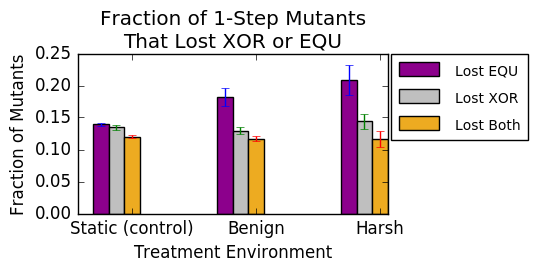

In [13]:
datafiles = ""
subdir = "../last_common_ancestor_mutation_landscapes"
for treatment in treatments:
    print (treatment)
    datafiles += subdir + "/" + treatment + "*_*/mutation_landscape_metrics.csv "
    #datafiles += 'average.dat 4 "../' + treatment + '_*/data*/" "' 
    #datafiles += "_".join(treatments[treatment].split(" ")) + '" '  

script = scripts_path + 'graph_generation/bar_chart_from_csv.py '
script += '--error '
script += '--xsize 850 --ysize 500 '
script += '--groups 3 --xticks "Static (control),Benign,Harsh" ' 
script += '--columns "12,11,13" '
script += '--legend "Lost EQU,Lost XOR,Lost Both" ' 
script += '--pair --title "Fraction of 1-Step Mutants\nThat Lost XOR or EQU" '
script += '--ylabel "Fraction of Mutants" --xlabel "Treatment Environment" '
script += '--separator "," '
script += 'onestep_lost_fluct.png '
script += datafiles
#script += 'c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv '

print (script)

!python2 $script

ipyImage('onestep_lost_fluct.png') 


control
noreward
punish
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py --error --xsize 1000 --ysize 500 --groups 3 --xticks "Static (control),Benign,Harsh" --columns "3" --pair --title "Fraction of 2-Step Mutants That Regained EQU 
" --ylabel "Fraction of Mutants" --xlabel "Treatment Environment" --separator "," twostep_regained_fluct.png ../../085/c*_i/mutation_landscape_metrics.csv ../../085/n*_i/mutation_landscape_metrics.csv ../../085/p*_i/mutation_landscape_metrics.csv 


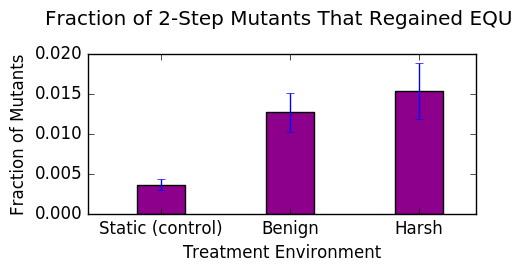

In [15]:
datafiles = ""
subdir = "../../085"
for treatment in treatments:
    print (treatment)
    datafiles += subdir + "/" + treatment[0] + "*_i/mutation_landscape_metrics.csv "
    #datafiles += 'average.dat 4 "../' + treatment + '_*/data*/" "' 
    #datafiles += "_".join(treatments[treatment].split(" ")) + '" '  

script = scripts_path + 'graph_generation/bar_chart_from_csv.py '
script += '--error '
script += '--xsize 1000 --ysize 500 '
script += '--groups 3 --xticks "Static (control),Benign,Harsh" ' 
script += '--columns "3" '
#script += '--legend "EQU Only,XOR Only,XOR & EQU" ' 
script += '--pair --title "Fraction of 2-Step Mutants That Regained EQU \n" '
script += '--ylabel "Fraction of Mutants" --xlabel "Treatment Environment" '
script += '--separator "," '
script += 'twostep_regained_fluct.png '
script += datafiles
#script += 'c*_degenerate_site_count.csv n*_degenerate_site_count.csv p*_degenerate_site_count.csv '

print (script)

!python2 $script

ipyImage('twostep_regained_fluct.png') 
